  # 📌 Klasifikasi Wine Quality dengan KNN
  Pada tugas ini, kita akan menggunakan Wine Quality Dataset. Dataset bisa diakses melalui link berikut:\
  🔗 https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

  Tujuan utama dari tugas ini adalah membangun model K-Nearest Neighbors (KNN) untuk mengklasifikasikan kualitas wine.

  Langkah-langkah yang harus dilakukan antara lain:
  1. Persiapan Dataset & Eksplorasi Awal
  - Memuat dataset, melihat struktur data, dan distribusi label.
  2. Preprocessing
  - Memproses data agar siap untuk digunakan dalam membangun model.
  3. Eksperimen Model KNN
  - Bangun model KNN dengan mencoba beberapa nilai k (misalnya 3, 5, dan 7) serta dua metric jarak (seperti Euclidean dan Manhattan).
  - Eksperimen ini bertujuan untuk membandingkan performa KNN dengan parameter yang berbeda.
  4. Evaluasi Model
  - Hitung metrik evaluasi seperti Accuracy, Precision, Recall, F1-Score, serta visualisasikan Confusion Matrix.
  5. Analisis & Kesimpulan
  - Bandingkan hasil antar eksperimen yang telah dilakukan dan berikan kesimpulan.

# 1. Persiapan Dataset & Eksplorasi Awal

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df_wine = pd.read_csv("WineQT.csv")

In [3]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
df_wine.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

<Axes: xlabel='quality'>

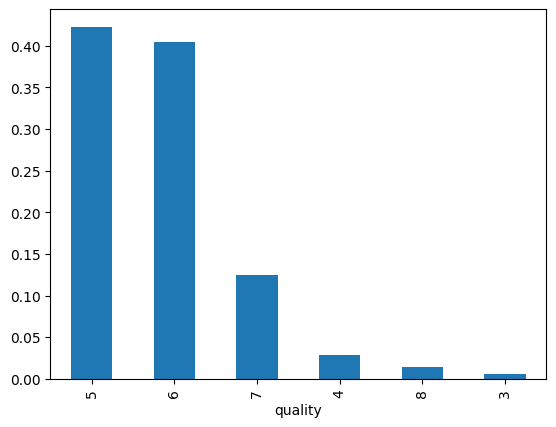

In [7]:
df_wine['quality'].value_counts(normalize=True).plot(kind='bar')

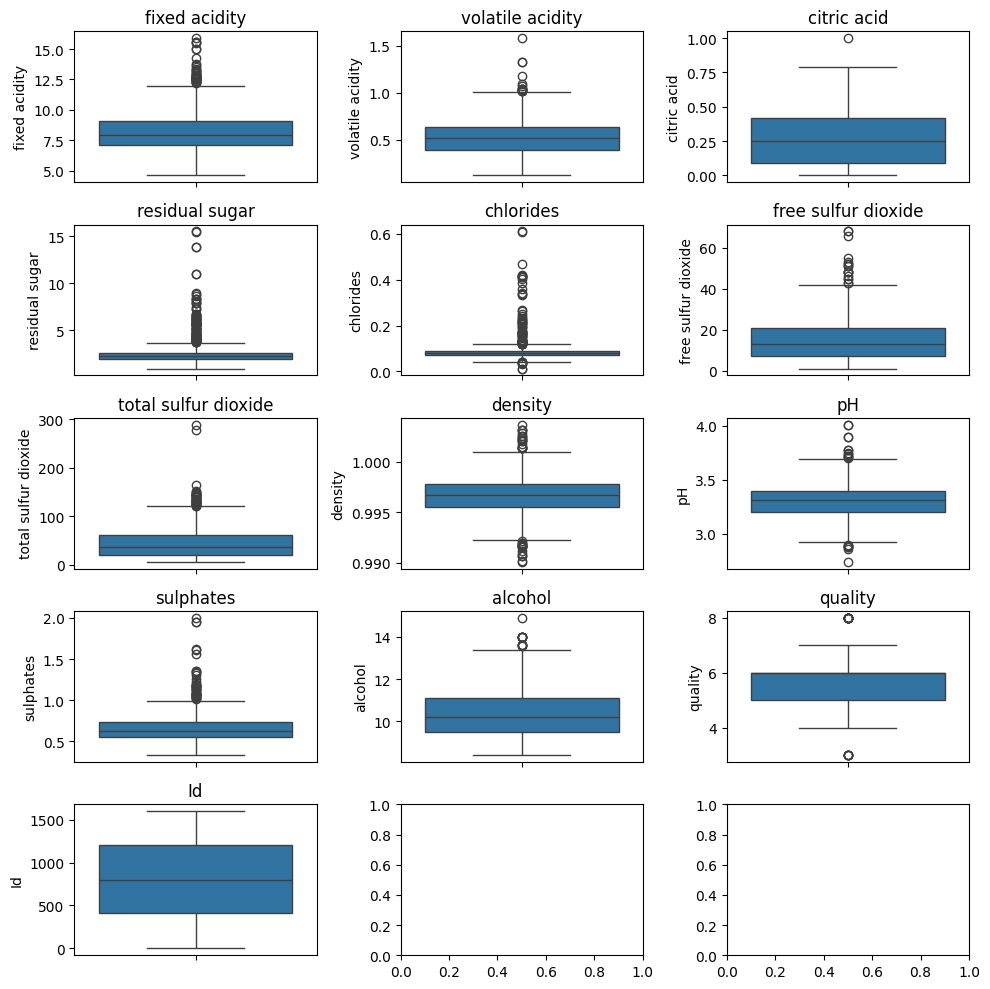

In [8]:
fig, axes = plt.subplots(5, 3, figsize=(10,10))
axes = axes.flatten()

for i, col in enumerate(df_wine.columns):
    sns.boxplot(df_wine[col], ax=axes[i])
    axes[i].tick_params(axis='x')  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

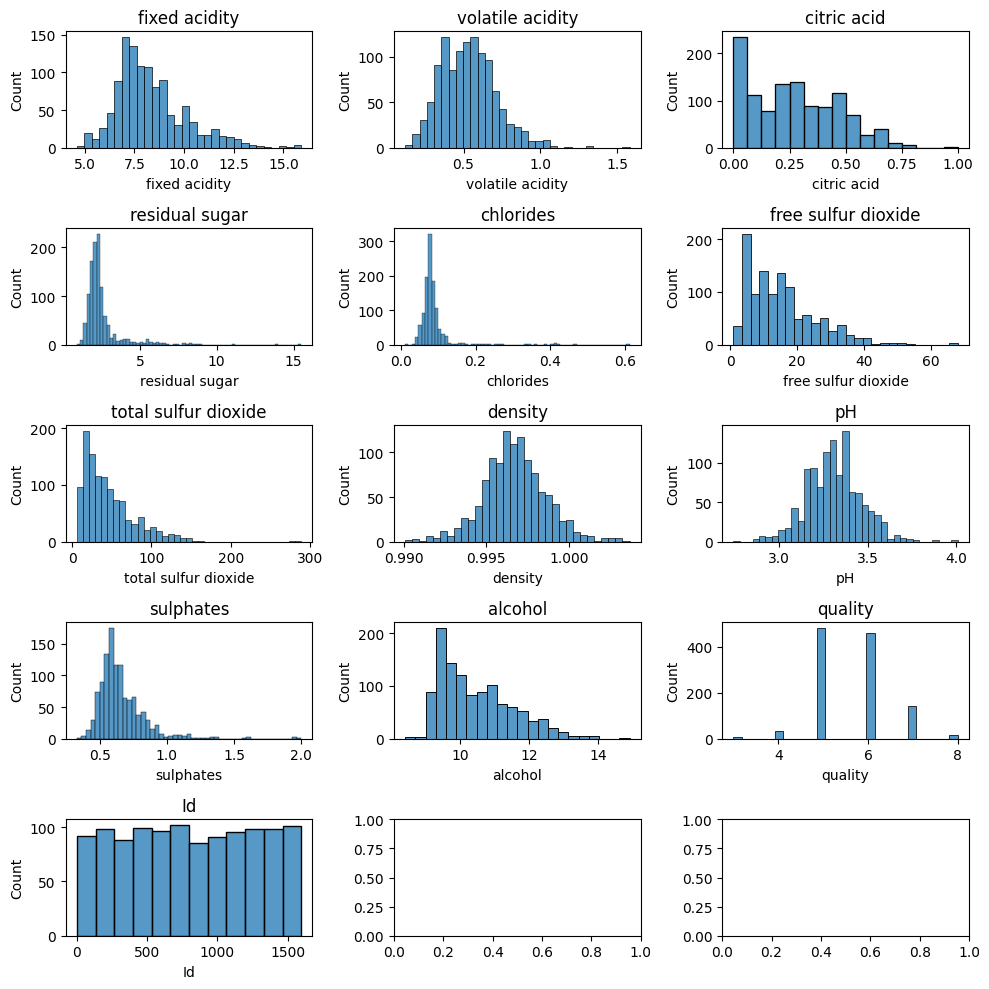

In [9]:
fig, axes = plt.subplots(5, 3, figsize=(10,10))
axes = axes.flatten()

for i, col in enumerate(df_wine.columns):
    sns.histplot(df_wine[col], ax=axes[i])
    axes[i].tick_params(axis='x')  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

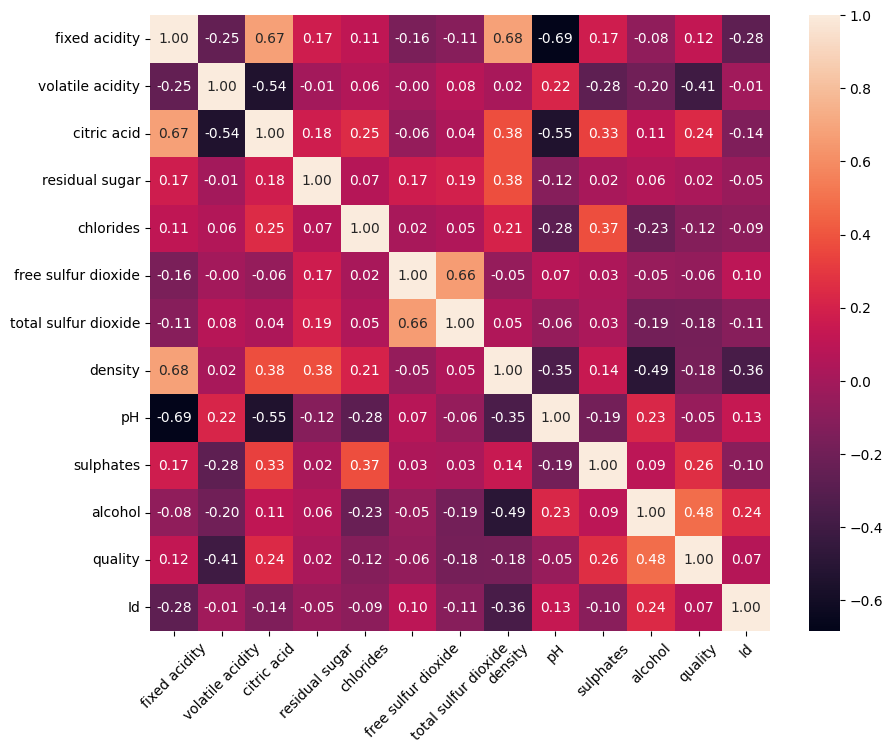

In [10]:
plt.figure(figsize=(10, 8))
korelasi = df_wine[df_wine.columns].corr(method='pearson')
sns.heatmap(korelasi, annot=True, fmt='.2f')
plt.xticks(rotation=45)
plt.show()

In [11]:
for col in df_wine.columns:
    print(df_wine[col].value_counts())
    print('-'*40)

fixed acidity
7.2     43
7.1     41
7.0     40
7.8     40
7.5     37
        ..
4.6      1
13.7     1
13.4     1
13.5     1
12.2     1
Name: count, Length: 91, dtype: int64
----------------------------------------
volatile acidity
0.600    32
0.500    32
0.430    31
0.390    29
0.580    28
         ..
1.035     1
0.565     1
0.865     1
0.965     1
0.160     1
Name: count, Length: 135, dtype: int64
----------------------------------------
citric acid
0.00    99
0.49    47
0.24    42
0.02    35
0.01    26
        ..
0.61     1
0.72     1
1.00     1
0.75     1
0.62     1
Name: count, Length: 77, dtype: int64
----------------------------------------
residual sugar
2.00    107
2.10    103
1.80     92
2.20     88
1.90     80
       ... 
7.30      1
7.20      1
2.95      1
3.65      1
4.40      1
Name: count, Length: 80, dtype: int64
----------------------------------------
chlorides
0.080    48
0.077    41
0.074    38
0.084    38
0.078    36
         ..
0.222     1
0.422     1
0.034     1
0

In [12]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

# 2. Preprocessing




In [13]:
df_wine.drop(columns=['Id'], inplace=True)

In [14]:
for c in df_wine.columns:
    q1 = df_wine[c].quantile(0.01)
    q99 = df_wine[c].quantile(0.99)
    df_wine[c] = df_wine[c].clip(q1, q99)

In [15]:
features = df_wine.drop(columns=["quality"]) 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
X_scaled = pd.DataFrame(X_scaled, columns=features.columns, index=df_wine.index)

X_keep = X_scaled.copy()
y_keep = df_wine["quality"].copy()

smote = SMOTE(random_state=42, k_neighbors=2)
X_smote_keep, y_smote_keep = smote.fit_resample(X_keep, y_keep)

print("Before balancing:")
print(y_keep.value_counts().sort_index())
print("\nAfter SMOTE:")
print(y_smote_keep.value_counts().sort_index())


Before balancing:
quality
4     39
5    483
6    462
7    143
8     16
Name: count, dtype: int64

After SMOTE:
quality
4    483
5    483
6    483
7    483
8    483
Name: count, dtype: int64


In [16]:
df_balance = pd.concat([X_smote_keep, y_smote_keep], axis=1)

# 3. Eksperimen Model KNN


In [17]:
# Pisahkan fitur & target
X = df_balance.drop(columns=['quality'])
y = df_balance['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
k_values = [3, 5, 7]
metrics = ['euclidean', 'manhattan']

In [19]:
results = []

for k in k_values:
    for metric in metrics:
        # Buat model KNN
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)

        # Prediksi data test
        y_pred = knn.predict(X_test)

        # Hitung akurasi
        acc = accuracy_score(y_test, y_pred)

        # Simpan hasil
        results.append({
            'k': k,
            'metric': metric,
            'accuracy': acc
        })

# 4. Evaluasi Model


In [20]:
for res in results:
    print(f"k={res['k']}, metric={res['metric']}, accuracy={res['accuracy']:.4f}")

k=3, metric=euclidean, accuracy=0.7702
k=3, metric=manhattan, accuracy=0.7723
k=5, metric=euclidean, accuracy=0.7702
k=5, metric=manhattan, accuracy=0.7660
k=7, metric=euclidean, accuracy=0.7598
k=7, metric=manhattan, accuracy=0.7371


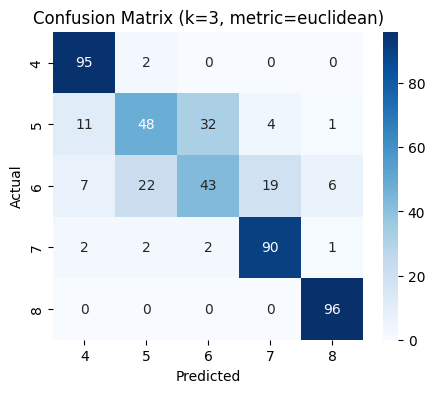

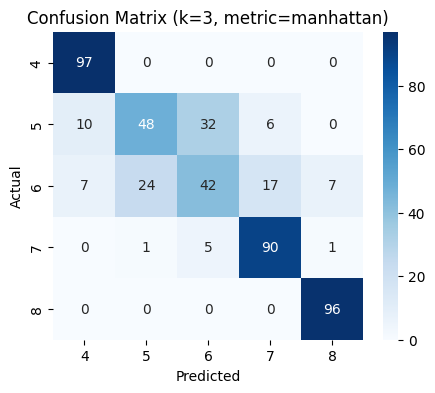

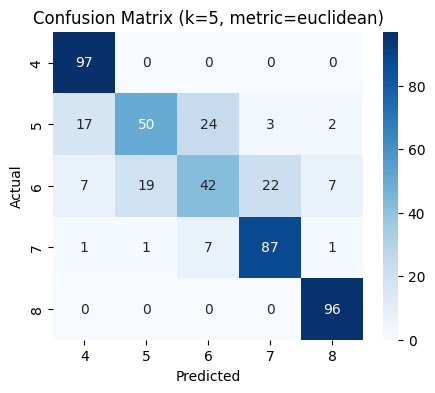

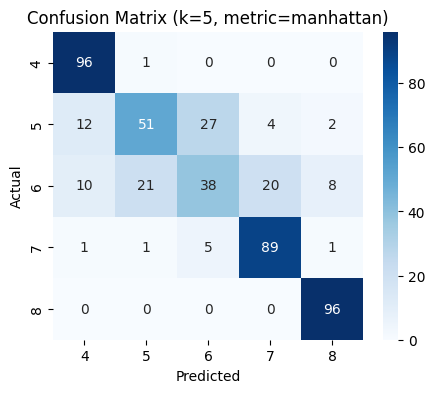

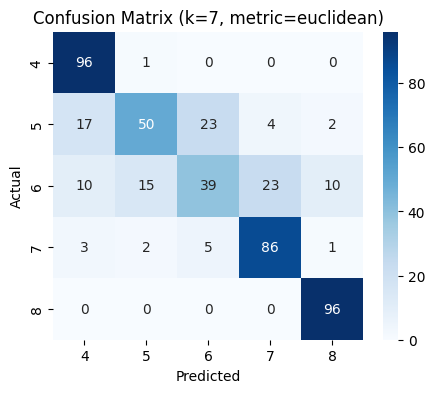

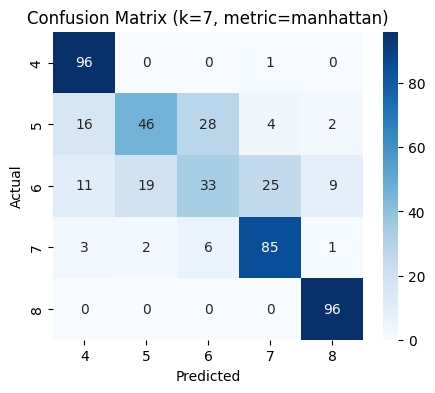

In [21]:
results = []

for k in k_values:
    for metric in metrics:
        # Buat model
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        
        # Prediksi
        y_pred = knn.predict(X_test)
        
        # Akurasi
        acc = accuracy_score(y_test, y_pred)
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
        
        # Simpan hasil
        results.append({
            'k': k,
            'metric': metric,
            'accuracy': acc,
            'confusion_matrix': cm
        })

        # Plot confusion matrix
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=sorted(y.unique()),
                    yticklabels=sorted(y.unique()))
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix (k={k}, metric={metric})")
        plt.show()


In [22]:
from sklearn.metrics import classification_report

for k in k_values:
    for metric in metrics:
        # Model
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)

        # Prediksi
        y_pred = knn.predict(X_test)

        # Classification Report
        print(f"\n=== Classification Report (k={k}, metric={metric}) ===")
        print(classification_report(y_test, y_pred, digits=4))


=== Classification Report (k=3, metric=euclidean) ===
              precision    recall  f1-score   support

           4     0.8261    0.9794    0.8962        97
           5     0.6486    0.5000    0.5647        96
           6     0.5584    0.4433    0.4943        97
           7     0.7965    0.9278    0.8571        97
           8     0.9231    1.0000    0.9600        96

    accuracy                         0.7702       483
   macro avg     0.7505    0.7701    0.7545       483
weighted avg     0.7504    0.7702    0.7544       483


=== Classification Report (k=3, metric=manhattan) ===
              precision    recall  f1-score   support

           4     0.8509    1.0000    0.9194        97
           5     0.6575    0.5000    0.5680        96
           6     0.5316    0.4330    0.4773        97
           7     0.7965    0.9278    0.8571        97
           8     0.9231    1.0000    0.9600        96

    accuracy                         0.7723       483
   macro avg     0.75

# 5. Analisis & Kesimpulan

Dari data di atas dapat kita simpulkan bahwa algoritma KNN untuk kasus ini k = 3 dan metric = euclidean adalah model terbaik dengan akurasi 0.7702